In [ ]:
!pip install image-quality
from brisque import BRISQUE
evaluation_metrics=[]

/usr/local/lib/python3.10/dist-packages/libsvm/svm.py:149: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def csr_to_problem_jit(l, x_val, x_ind, x_rowptr, prob_val, prob_ind, prob_rowptr, indx_start):


The notebook https://www.kaggle.com/code/soumya9977/learning-to-sea-underwater-img-enhancement-eda is EDA and then processing of the dataset of the competition
https://www.kaggle.com/competitions/tensorflow-great-barrier-reef

For the image enhancement part, they have worked on using the 4 techniques with given codes –

•	Histogram equalization

•	CLAHE

•	Gamma Correction

•	ICM

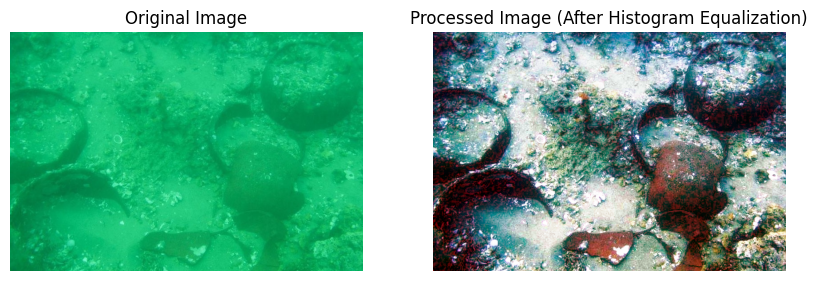

In [ ]:
#HE
import cv2
import matplotlib.pyplot as plt

def RecoverHE(sceneRadiance):
    for i in range(3):
        sceneRadiance[:, :, i] = cv2.equalizeHist(sceneRadiance[:, :, i])
    return sceneRadiance

image_path = "/content/18_img_.png"
original_image = cv2.imread(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

processed_image = RecoverHE(original_image)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After Histogram Equalization)")
plt.axis("off")

plt.show()

obj = BRISQUE(url=False)
score = obj.score(processed_image)
evaluation_metrics.append(score)

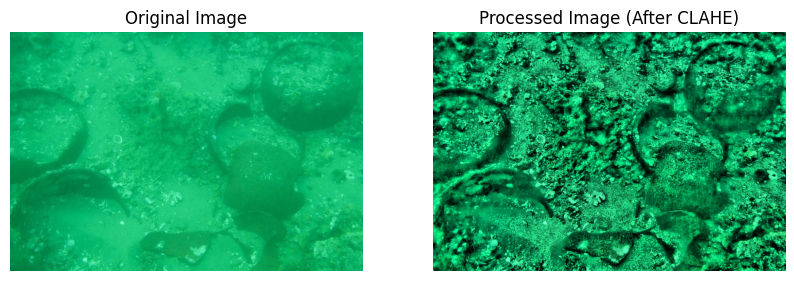

In [ ]:
#CLAHE
import cv2
import numpy as np
import matplotlib.pyplot as plt

def clahe_hsv(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
    clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(20, 20))
    v = clahe.apply(v)
    hsv_img = np.dstack((h, s, v))
    rgb = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    return rgb

image_path = "/content/18_img_.png"
original_image = cv2.imread(image_path)
processed_image = clahe_hsv(original_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(processed_image)
plt.title("Processed Image (After CLAHE)")
plt.axis("off")
plt.show()


obj = BRISQUE(url=False)
score = obj.score(processed_image)
evaluation_metrics.append(score)

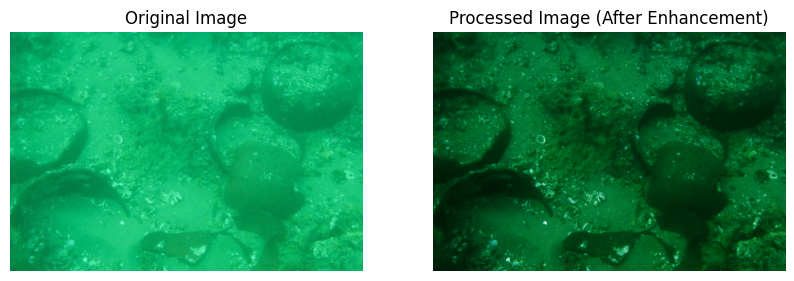

In [ ]:
#Gamma Correction
import cv2
import numpy as np
import matplotlib.pyplot as plt

def RecoverGC(sceneRadiance):
    sceneRadiance = sceneRadiance / 255.0
    for i in range(3):
        sceneRadiance[:, :, i] = np.power(sceneRadiance[:, :, i] / float(np.max(sceneRadiance[:, :, i])), 3.2)
    sceneRadiance = np.clip(sceneRadiance * 255, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)
    return sceneRadiance

image_path = "/content/18_img_.png"
original_image = cv2.imread(image_path)
processed_image = RecoverGC(original_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After Enhancement)")
plt.axis("off")

plt.show()


obj = BRISQUE(url=False)
score = obj.score(processed_image)
evaluation_metrics.append(score)

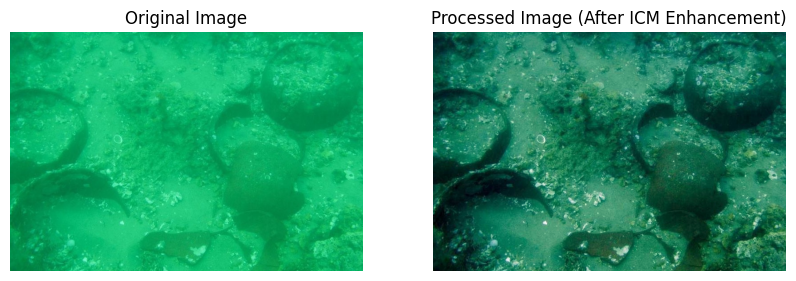

In [ ]:
#ICM
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb

def global_stretching(img_L, height, width):
    I_min = np.min(img_L)
    I_max = np.max(img_L)
    I_mean = np.mean(img_L)

    array_Global_histogram_stretching_L = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            p_out = (img_L[i][j] - I_min) * ((1) / (I_max - I_min))
            array_Global_histogram_stretching_L[i][j] = p_out

    return array_Global_histogram_stretching_L

def stretching(img):
    height, width, _ = img.shape
    for k in range(3):
        Max_channel = np.max(img[:, :, k])
        Min_channel = np.min(img[:, :, k])
        for i in range(height):
            for j in range(width):
                img[i, j, k] = (img[i, j, k] - Min_channel) * (255 - 0) / (Max_channel - Min_channel) + 0
    return img

def HSVStretching(sceneRadiance):
    height, width, _ = sceneRadiance.shape
    img_hsv = rgb2hsv(sceneRadiance)
    h, s, v = cv2.split(img_hsv)
    img_s_stretching = global_stretching(s, height, width)
    img_v_stretching = global_stretching(v, height, width)

    labArray = np.zeros((height, width, 3), 'float64')
    labArray[:, :, 0] = h
    labArray[:, :, 1] = img_s_stretching
    labArray[:, :, 2] = img_v_stretching
    img_rgb = hsv2rgb(labArray) * 255

    return img_rgb

def sceneRadianceRGB(sceneRadiance):
    sceneRadiance = np.clip(sceneRadiance, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)
    return sceneRadiance

def RecoverICM(img1):
    img = stretching(img1)
    sceneRadiance = sceneRadianceRGB(img)
    sceneRadiance = HSVStretching(sceneRadiance)
    sceneRadiance = sceneRadianceRGB(sceneRadiance)
    return sceneRadiance


image_path = "/content/18_img_.png"
original_image = cv2.imread(image_path)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


processed_image = RecoverICM(original_image)


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After ICM Enhancement)")
plt.axis("off")

plt.show()


obj = BRISQUE(url=False)
score = obj.score(processed_image)
evaluation_metrics.append(score)

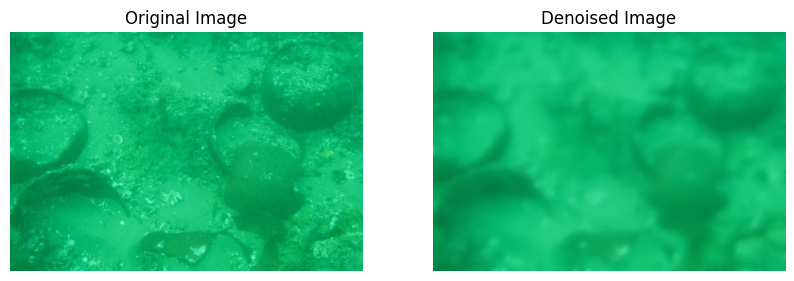

In [ ]:
# Denoising
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_bregman

# Load the image
image = io.imread('/content/18_img_.png')

# Convert image to floating point representation
image = img_as_float(image)

# Apply Total Variation denoising
denoised_image = denoise_tv_bregman(image, weight=0.1)

# Plot original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title('Denoised Image')
plt.axis('off')

plt.show()


obj = BRISQUE(url=False)
score = obj.score(processed_image)
evaluation_metrics.append(score)

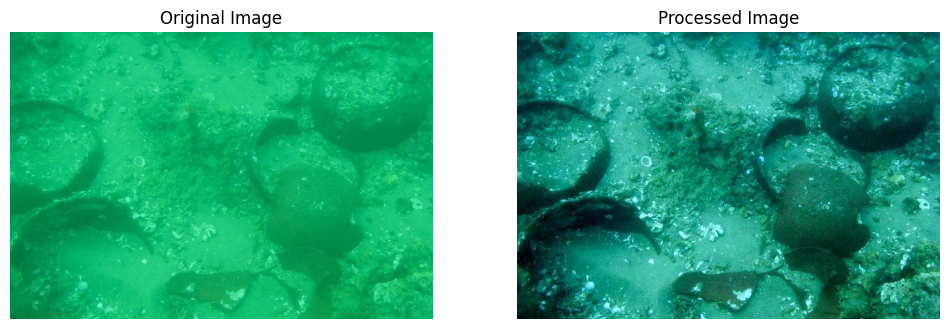

In [ ]:
#UCM
def cal_equalisation(img,ratio):
    Array = img * ratio
    Array = np.clip(Array, 0, 255)
    return Array

def RGB_equalisation(img):
    img = np.float32(img)
    avg_RGB = []
    for i in range(3):
        avg = np.mean(img[:,:,i])
        avg_RGB.append(avg)
    # print('avg_RGB',avg_RGB)
    a_r = avg_RGB[0]/avg_RGB[2]
    a_g =  avg_RGB[0]/avg_RGB[1]
    ratio = [0,a_g,a_r]
    for i in range(1,3):
        img[:,:,i] = cal_equalisation(img[:,:,i],ratio[i])
    return img

def histogram_r(r_array,height, width):
    length = height * width
    R_rray = []
    for i in range(height):
        for j in range(width):
            R_rray.append(r_array[i][j])
    R_rray.sort()
    I_min = int(R_rray[int(length / 500)])
    I_max = int(R_rray[-int(length / 500)])
    array_Global_histogram_stretching = np.zeros((height, width))
    for i in range(0, height):
        for j in range(0, width):
            if r_array[i][j] < I_min:
                # p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = I_min
            elif (r_array[i][j] > I_max):
                p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = 255
            else:
                p_out = int((r_array[i][j] - I_min) * ((255 - I_min) / (I_max - I_min)))+ I_min
                array_Global_histogram_stretching[i][j] = p_out
    return (array_Global_histogram_stretching)

def histogram_g(r_array,height, width):
    length = height * width
    R_rray = []
    for i in range(height):
        for j in range(width):
            R_rray.append(r_array[i][j])
    R_rray.sort()
    I_min = int(R_rray[int(length / 500)])
    I_max = int(R_rray[-int(length / 500)])
    array_Global_histogram_stretching = np.zeros((height, width))
    for i in range(0, height):
        for j in range(0, width):
            if r_array[i][j] < I_min:
                p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = 0
            elif (r_array[i][j] > I_max):
                p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = 255
            else:
                p_out = int((r_array[i][j] - I_min) * ((255) / (I_max - I_min)) )
                array_Global_histogram_stretching[i][j] = p_out
    return (array_Global_histogram_stretching)

def histogram_b(r_array,height, width):
    length = height * width
    R_rray = []
    for i in range(height):
        for j in range(width):
            R_rray.append(r_array[i][j])
    R_rray.sort()
    I_min = int(R_rray[int(length / 500)])
    I_max = int(R_rray[-int(length / 500)])
    array_Global_histogram_stretching = np.zeros((height, width))
    for i in range(0, height):
        for j in range(0, width):
            if r_array[i][j] < I_min:
                # p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = 0
            elif (r_array[i][j] > I_max):
                # p_out = r_array[i][j]
                array_Global_histogram_stretching[i][j] = I_max
            else:
                p_out = int((r_array[i][j] - I_min) * ((I_max) / (I_max - I_min)))
                array_Global_histogram_stretching[i][j] = p_out
    return (array_Global_histogram_stretching)

def stretching(img):
    height = len(img)
    width = len(img[0])
    img[:, :, 2] = histogram_r(img[:, :, 2], height, width)
    img[:, :, 1] = histogram_g(img[:, :, 1], height, width)
    img[:, :, 0] = histogram_b(img[:, :, 0], height, width)
    return img


def global_stretching(img_L,height, width):
    I_min = np.min(img_L)
    I_max = np.max(img_L)
    I_mean = np.mean(img_L)


    # print('I_min',I_min)
    # print('I_max',I_max)
    # print('I_max',I_mean)

    array_Global_histogram_stretching_L = np.zeros((height, width))
    for i in range(0, height):
        for j in range(0, width):
            p_out = (img_L[i][j] - I_min) * ((1) / (I_max - I_min))
            array_Global_histogram_stretching_L[i][j] = p_out

    return array_Global_histogram_stretching_L

def  HSVStretching(sceneRadiance):
    sceneRadiance = np.uint8(sceneRadiance)
    height = len(sceneRadiance)
    width = len(sceneRadiance[0])
    img_hsv = rgb2hsv(sceneRadiance)
    h, s, v = cv2.split(img_hsv)
    img_s_stretching = global_stretching(s, height, width)
    img_v_stretching = global_stretching(v, height, width)

    labArray = np.zeros((height, width, 3), 'float64')
    labArray[:, :, 0] = h
    labArray[:, :, 1] = img_s_stretching
    labArray[:, :, 2] = img_v_stretching
    img_rgb = hsv2rgb(labArray) * 255

    # img_rgb = np.clip(img_rgb, 0, 255)

    return img_rgb

def sceneRadianceRGB(sceneRadiance):

    sceneRadiance = np.clip(sceneRadiance, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)

    return sceneRadiance


original_image = io.imread('/content/18_img_.png')

sceneRadiance = RGB_equalisation(original_image)
sceneRadiance = stretching(sceneRadiance)
sceneRadiance = HSVStretching(sceneRadiance)
sceneRadiance = sceneRadianceRGB(sceneRadiance)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sceneRadiance)
plt.title('Processed Image')
plt.axis('off')

plt.show()


obj = BRISQUE(url=False)
score = obj.score(sceneRadiance)
evaluation_metrics.append(score)



In [ ]:
metrics = ['HE','CLAHE','GC','ICM','Denoised image','UCM']
max_index = evaluation_metrics.index(min(evaluation_metrics))
print("According to PSNR best is:",metrics[max_index])

According to PSNR best is: GC


In [ ]:
evaluation_metrics

[15.527547764432342,
 16.77581369453432,
 7.635750657059788,
 11.028157642199147,
 11.028157642199147,
 11.5754178619446]

In [ ]:
image_path = "/content/18_img_.png"
original_image = cv2.imread(image_path)
obj = BRISQUE(url=False)
score = obj.score(original_image)
print(score)

13.30636652107168
